# **FOOD101**

**UPLOADING THE REQUIRED DATASET**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
!git clone https://github.com/Bhavnoor-Coders-1010/food101


fatal: destination path 'food101' already exists and is not an empty directory.


array([[[ 43, 117, 145],
        [ 37, 114, 141],
        [ 38, 118, 147],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 25, 106, 133],
        [ 31, 115, 141],
        [ 27, 111, 139],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 17, 113, 136],
        [ 20, 113, 138],
        [ 22, 112, 142],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
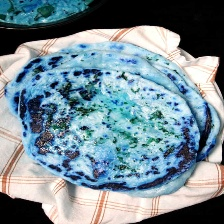

In [24]:

img = cv2.imread('/content/food101/DataFOOD101/Test/100060.jpg')
np.array(img)

In [4]:
test_df = pd.read_csv('/content/food101/DataFOOD101/test.csv')
train_df = pd.read_csv('/content/food101/DataFOOD101/train.csv')
print(train_df.shape)
print(test_df.shape)

(5314, 2)
(939, 3)


In [ ]:

#defining path
DIR = r'/content/food101/DataFOOD101'
test_img_dir = r'/content/food101/DataFOOD101/Test'
train_img_dir = r'/content/food101/DataFOOD101/Train'
test_csv = r'/content/food101/DataFOOD101/test.csv'
train_csv = r'/content/food101/DataFOOD101/train.csv'
test_df = pd.read_csv(test_csv)
train_df = pd.read_csv(train_csv)

#creating output dir
OUTPUT_dir = r'/content/preprocessed_data'
test_output_dir = r'/content/preprocessed_data/Test'
train_output_dir = r'/content/preprocessed_data/Train'
os.mkdir(OUTPUT_dir)
os.mkdir(test_output_dir)
os.mkdir(train_output_dir)

train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

#creating a function to preprocess and convert the data into numpy array
food = ['burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'idli', 'jalebi', 'kathi_roll', 'kadhai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa']

def preprocess_data(t, type_dir,label_list,food,output_dir):
  labels = []
  features = []


  for index, row in label_list.iterrows():
    imagePath = row['imagePath']
    label = row['label']
    img_path = os.path.join(type_dir, imagePath)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(224,224))
    features.append(img_arr)
    labels.append(label)

    # data augmentation to increase accuracy
    if t == 'Train':
      features.append(cv2.flip(img_arr,1))
      labels.append(label)
      features.append(cv2.rotate(img_arr, cv2.ROTATE_90_CLOCKWISE))
      labels.append(label)
      features.append(cv2.rotate(img_arr, cv2.ROTATE_90_COUNTERCLOCKWISE))
      labels.append(label)


  # normalizing the image
  images_np = np.array(features)/255.0
  labels_np = np.array(labels)

  # saving the numpy data
  np.save(os.path.join(output_dir,'images.npy'),images_np)
  np.save(os.path.join(output_dir,'labels.npy'), labels_np)

  print("Preprocessing Done")


#preprocessing data for test and train data
preprocess_data(t= 'Test',type_dir= test_img_dir,label_list=test_df, food=food,  output_dir=test_output_dir)
preprocess_data(t = 'Train', type_dir=train_img_dir,label_list=train_df, food=food,  output_dir=train_output_dir)



#using imagedatagenerator for preprocessing of images for test, validation and test
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# val_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2
# )

# test_datagen = ImageDataGenerator(
#     rescale = 1./255
# )

#generating training, validation and testing data
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe = train_df,
#     directory = train_img_dir,
#     x_col = 'imagePath',
#     y_col = 'label',
#     target_size = (64,64),
#     batch_size = 32,
#     class_mode = 'categorical',
#     subset = 'training',
#     shuffle = True
# )

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe = train_df,
#     directory = train_img_dir,
#     x_col = 'imagePath',
#     y_col = 'label',
#     target_size = (64,64),
#     batch_size = 32,
#     class_mode = 'categorical',
#     subset = 'validation'
# )

# test_generator = test_datagen.flow_from_dataframe(
#     dataframe = test_df,
#     directory = test_img_dir,
#     x_col = 'imagePath',
#     y_col = 'label',
#     target_size = (64,64),
#     batch_size = 32,
#     class_mode = 'categorical',
# )





Preprocessing Done


**EXTRACING THE DATA INTO SEPARATE DIRECTORIES FOR TRAINING, TESTING AND VALIDATION**


In [6]:
def load_data(subset_dir):
  images = np.load(os.path.join(subset_dir, 'images.npy'))
  labels = np.load(os.path.join(subset_dir, 'labels.npy'))
  return images, labels

training_images, training_labels = load_data('/content/preprocessed_data/Train')
testing_images, testing_labels = load_data('/content/preprocessed_data/Test')

print(f"Train Data: {training_images.shape}, {training_labels.shape}")
print(f"Test Data: {testing_images.shape}, {testing_labels.shape}")

Train Data: (15942, 64, 64, 3), (15942,)
Test Data: (939, 64, 64, 3), (939,)


**SPLITTING FOR VALIDATION DATA**

In [7]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(training_images, training_labels, test_size=0.1, random_state=42)


**CREATING CNN MODEL FOR TRAINING**

In [8]:
#importing required lib
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [9]:
# Convert labels to categorical
train_labels_cat = to_categorical(train_labels)
val_labels_cat = to_categorical(val_labels)
testing_labels_cat = to_categorical(testing_labels)

#data augmentation for better reaulst using image data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_images, train_labels_cat, batch_size=200)
val_generator = val_datagen.flow(val_images, val_labels_cat, batch_size=200)

print(f'Train Data: {train_generator.n}, {train_generator.batch_size}')
print(f'Validation Data: {val_generator.n}, {val_generator.batch_size}')

Train Data: 14347, 200
Validation Data: 1595, 200


In [10]:
# creating convolutional base from vgg16
conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
# conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

<ipython-input-10-4c6b5f95afdc>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(64,64,3))


In [11]:
conv_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 32, 32, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 32, 32, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 32, 32, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 32, 32, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 32, 32, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 33, 33, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 16, 16, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 16, 16, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 16, 16, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 16, 16, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 16, 16, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [12]:
#adding classification head
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

conv_base.trainable = False
# set_trainable = False
# for layer in conv_base.layers[-10:]:
#   layer.trainable = True

# for layer in conv_base.layers:
#   if layer.name=='block5_conv1':
#     set_trainable=True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False


# for layer in conv_base.layers:
#   print(layer.name, layer.trainable)

#defining early_stopping and lr
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)


In [13]:
#graphical representation of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 2, 2, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,313,172 (16.45 MB)

 Trainable params: 1,084,308 (4.14 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [14]:
#compiling the model
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

**TRAINING MY MODEL**

In [15]:
history = model.fit(train_images, train_labels_cat, validation_data = [val_images, val_labels_cat], epochs=30, shuffle=True)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.1207 - loss: 3.1868 - val_accuracy: 0.3793 - val_loss: 2.2660
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2939 - loss: 2.4198 - val_accuracy: 0.4464 - val_loss: 1.9911
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3544 - loss: 2.1833 - val_accuracy: 0.4614 - val_loss: 1.8955
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4096 - loss: 2.0288 - val_accuracy: 0.4815 - val_loss: 1.8351
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4264 - loss: 1.9404 - val_accuracy: 0.5129 - val_loss: 1.7574
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4560 - loss: 1.8268 - val_accuracy: 0.5154 - val_loss: 1.7495
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4881 - loss: 1.7215 - val_accuracy: 0.5273 - val_loss: 1.7018
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4999 - loss: 1.6709 - val_accuracy: 

In [18]:
#fine tuning ...freezing some layers then training again
conv_base.trainable = False
set_trainable = False
for layer in conv_base.layers[-20:]:
  layer.trainable = True

# for layer in conv_base.layers:
#   if layer.name=='block5_conv1':
#     set_trainable=True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_layer False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 True
conv_dw_6 True
conv_dw_6_bn True
conv_dw_6_relu True
conv_pw_6 True
conv_pw_6_bn True
conv_pw_6_relu True
conv_dw_7 True
conv_dw_7_bn True
conv_dw_7_relu True
conv_pw_7 True
conv_pw_7_bn True
conv_pw_7_relu True
conv_dw_8 True
conv_dw_8_bn True
conv_dw_8_relu True
conv_pw_8 True
conv_pw_8_bn True
conv_pw_8_relu True
conv_dw_9 

In [19]:
#compiling and recording fine tuning data
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(train_images, train_labels_cat ,validation_data = [val_images, val_labels_cat], epochs=20, shuffle=True)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.2305 - loss: 5.3695 - val_accuracy: 0.3047 - val_loss: 2.4256
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.2634 - loss: 2.6160 - val_accuracy: 0.3680 - val_loss: 2.1522
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3318 - loss: 2.3088 - val_accuracy: 0.4163 - val_loss: 2.0357
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3804 - loss: 2.1578 - val_accuracy: 0.4652 - val_loss: 1.8856
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4297 - loss: 1.9858 - val_accuracy: 0.5016 - val_loss: 1.7288
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4606 - loss: 1.8645 - val_accuracy: 0.5304 - val_loss: 1.6557
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5111 - loss: 1.6886 - val_accuracy: 0.5511 - val_loss: 1.5663
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5435 - loss: 1.5848 - val_ac

**TESTING MY DATA**

In [20]:
results = model.evaluate(testing_images, testing_labels_cat)
print("Loss = ",results[0]*100,"%")
print("Accuracy = ",results[1]*100,"%")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5708 - loss: 2.0972
Loss =  188.46769332885742 %
Accuracy =  61.0223650932312 %


**EVALUATING THE MODEL**

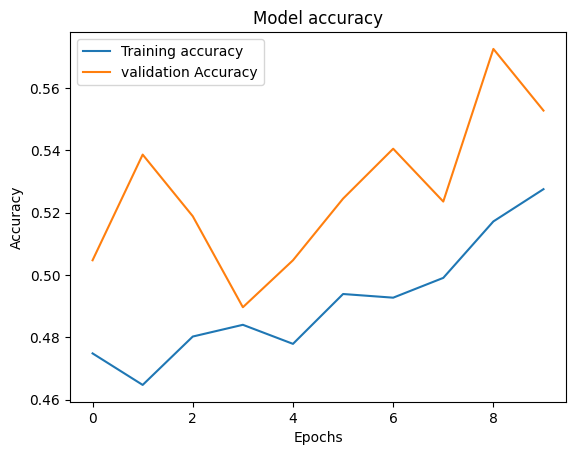

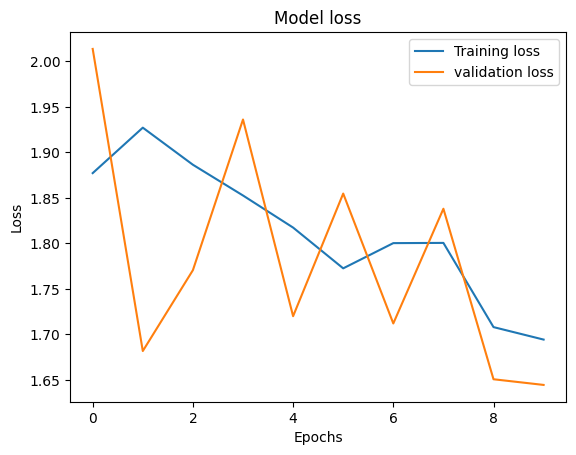

In [ ]:
# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly to plot loss
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**SAVING THE MODEL**

In [21]:
model.save('/content/FOOD101_model.h5')

**PERFORMING IT ON AN IMAGE AND SHOWCASING THE RESULT**